In [1]:
from matplotlib import pyplot as plt

def plot_loss(loss_values, val_loss_values):
    epochs = range(1, len(loss_values) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 114s 6ms/step - loss: 0.4948 - acc: 0.7648 - val_loss: 0.5224 - val_acc: 0.8042
Epoch 2/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.3102 - acc: 0.8813 - val_loss: 0.5878 - val_acc: 0.7664
Epoch 3/10
20000/20000 [==============================] - 113s 6ms/step - loss: 0.2625 - acc: 0.9028 - val_loss: 0.3303 - val_acc: 0.8648
Epoch 4/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.2203 - acc: 0.9189 - val_loss: 0.3995 - val_acc: 0.8710
Epoch 5/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.1922 - acc: 0.9334 - val_loss: 0.4598 - val_acc: 0.8668
Epoch 6/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.1770 - acc: 0.9387 - val_loss: 0.3790 - val_acc: 0.8756
Epo

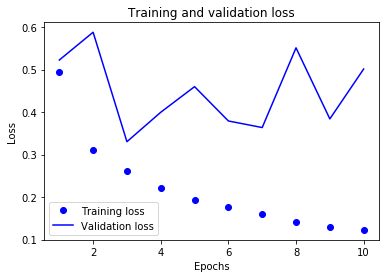

In [2]:
# Process reviews in reversed order
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)

x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

plot_loss(history.history['loss'], history.history['val_loss'])

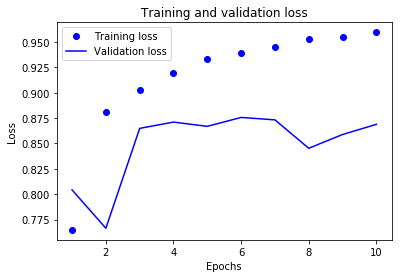

In [3]:
plot_loss(history.history['acc'], history.history['val_acc'])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 212s 11ms/step - loss: 0.5582 - acc: 0.7166 - val_loss: 0.3971 - val_acc: 0.8482
Epoch 2/10
20000/20000 [==============================] - 208s 10ms/step - loss: 0.3245 - acc: 0.8773 - val_loss: 0.3280 - val_acc: 0.8848
Epoch 3/10
20000/20000 [==============================] - 210s 11ms/step - loss: 0.2687 - acc: 0.8987 - val_loss: 0.4945 - val_acc: 0.8524
Epoch 4/10
20000/20000 [==============================] - 208s 10ms/step - loss: 0.2318 - acc: 0.9165 - val_loss: 0.3176 - val_acc: 0.8798
Epoch 5/10
20000/20000 [==============================] - 209s 10ms/step - loss: 0.2049 - acc: 0.9289 - val_loss: 0.3522 - val_acc: 0.8880
Epoch 6/10
20000/20000 [==============================] - 208s 10ms/step - loss: 0.1883 - acc: 0.9347 - val_loss: 0.4962 - val_acc: 0.7960
Epoch 7/10
20000/20000 [==============================] - 210s 11ms/step - loss: 0.1703 - acc: 0.9403 - val_loss: 0.3

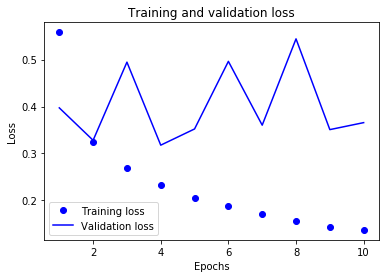

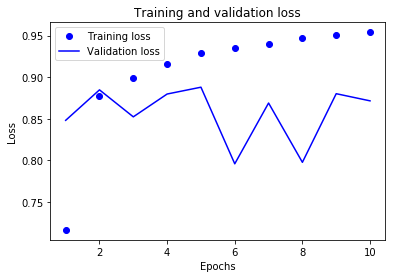

In [4]:
# Using biderectionnal layer
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

plot_loss(history.history['loss'], history.history['val_loss'])
plot_loss(history.history['acc'], history.history['val_acc'])